# Introduction
In this notebook we will finally be taking a deep dive into the data we have scraped to gain interesting insights on the powerlifting community. I am particulary interested in what meterics effect strength, particularly the bench press.

In [48]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import geopandas as gpd

In [4]:
PROCESSED_DATA_PATH = "../data/processed/processed_lifting_data.csv"

df = pd.read_csv(PROCESSED_DATA_PATH)

df.head()

,Name,Instagram_Handle,Origin,Federation,Competition_Date,Competition_Country,Competition_City,Gender,Equipment,Age,Weight,Class,Squat,Bench,Deadlift,Total,Dots
0,Marianna Gasparyan,power_mayan,USA,WRPF,2019-04-27,USA,CA,F,Wraps,30.0,123.4,123.0,573.2,292.1,485.0,1350.3,709.96
1,Kristy Hawkins,kristy_hawkins,USA,WRPF,2022-07-29,USA,VA,F,Wraps,41.0,163.8,165.0,639.3,336.2,611.7,1587.3,704.76
2,Hunter Henderson #1,huntermhenderson,USA,WRPF,2021-04-24,USA,CA,F,Wraps,26.0,163.8,165.0,650.3,325.1,573.2,1548.7,687.63
3,Chakera Ingram,c.c_ingram,USA,USPA,2019-08-03,USA,TX,F,Wraps,24.0,177.2,181.0,639.3,374.8,595.2,1609.3,686.14
4,Stefanie Cohen,steficohen,USA,WRPF,2019-04-27,USA,CA,F,Wraps,27.0,119.9,123.0,507.0,242.5,529.1,1278.6,685.45


In [5]:
df.describe()

,Age,Weight,Class,Squat,Bench,Deadlift,Total,Dots
count,350687.000000,451800.000000,447686.000000,326940.000000,423897.000000,364841.000000,451800.00000,451800.000000
mean,28.284579,184.053829,187.539224,362.027168,243.775077,417.623612,828.80701,273.977700
std,11.297943,47.130080,45.548741,132.892094,99.467008,132.305954,433.83273,120.755537
min,0.000000,35.000000,59.000000,2.200000,10.300000,2.200000,52.50000,33.690000
25%,20.000000,148.800000,153.000000,253.500000,154.300000,308.600000,450.00000,158.220000
50%,26.000000,179.600000,183.000000,358.200000,248.000000,424.400000,804.70000,303.350000
75%,33.000000,213.400000,220.000000,451.900000,314.100000,513.600000,1179.40000,365.630000
max,96.000000,573.200000,341.000000,1102.300000,782.600000,1030.600000,2606.90000,709.960000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451800 entries, 0 to 451799
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 451800 non-null  object 
 1   Instagram_Handle     9183 non-null    object 
 2   Origin               265552 non-null  object 
 3   Federation           451800 non-null  object 
 4   Competition_Date     451800 non-null  object 
 5   Competition_Country  451800 non-null  object 
 6   Competition_City     307999 non-null  object 
 7   Gender               451800 non-null  object 
 8   Equipment            451800 non-null  object 
 9   Age                  350687 non-null  float64
 10  Weight               451800 non-null  float64
 11  Class                447686 non-null  float64
 12  Squat                326940 non-null  float64
 13  Bench                423897 non-null  float64
 14  Deadlift             364841 non-null  float64
 15  Total            

### Number of meets by country

In [9]:
print(f'Over {len(df["Competition_Country"].unique())} countries host powerlifting competitons')

Over 111 countries host powerlifting competitons


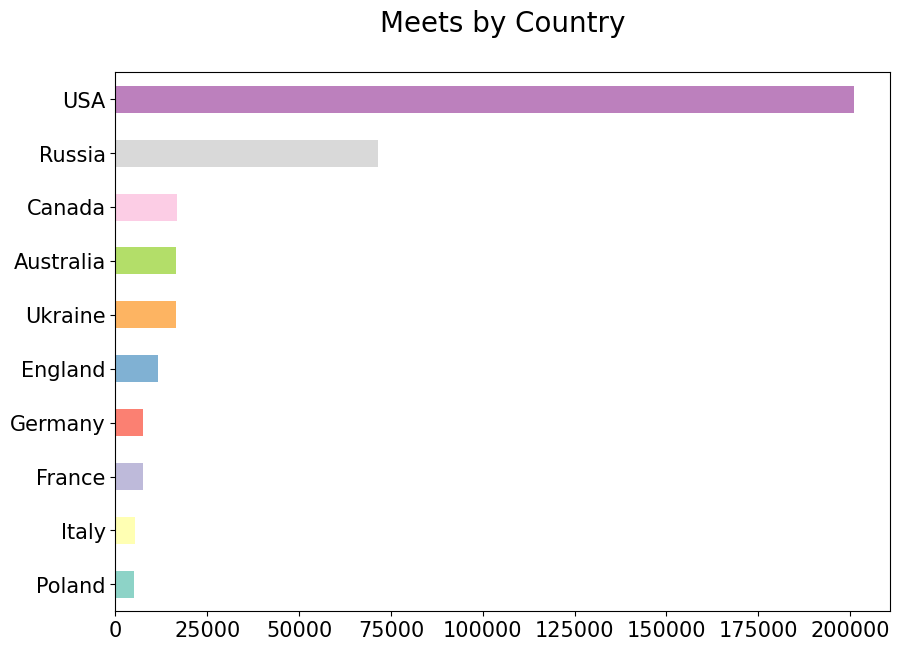

USA          200929
Russia        71533
Canada        16815
Australia     16596
Ukraine       16571
England       11571
Germany        7526
France         7371
Italy          5435
Poland         4965
Name: Competition_Country, dtype: int64

In [34]:
plt.figure(figsize=(10,7))
df["Competition_Country"].value_counts()[:10].sort_values(ascending=True).plot(
    kind='barh',color=plt.cm.Set3(range(10))
)
plt.title('Meets by Country\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

df["Competition_Country"].value_counts()[:10]

As we can see America holds the most powerlifting competitions coming in at a a staggering 200929

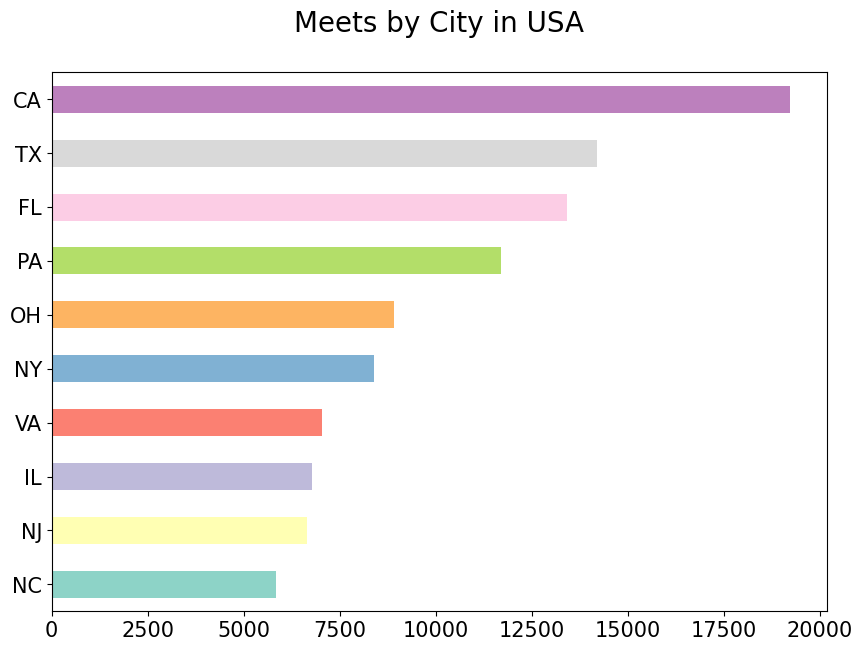

CA    19224
TX    14209
FL    13430
PA    11709
OH     8921
NY     8390
VA     7042
IL     6785
NJ     6654
NC     5852
Name: Competition_City, dtype: int64

In [46]:
plt.figure(figsize=(10,7))
df.loc[df["Competition_Country"] == "USA"]["Competition_City"].value_counts()[:10].sort_values(ascending=True).plot(
    kind='barh',color=plt.cm.Set3(range(10))
)
plt.title('Meets by City in USA\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

df.loc[df["Competition_Country"] == "USA"]["Competition_City"].value_counts()[:10]

In [80]:
USA_city_df = df.loc[df["Competition_Country"] == "USA"]["Competition_City"].value_counts()
USA_city_df = USA_city_df.to_frame().reset_index()

# Rename the columns
USA_city_df.columns = ["Competition_City", "Count"]

USA_city_df.head()

,Competition_City,Count
0,CA,19224
1,TX,14209
2,FL,13430
3,PA,11709
4,OH,8921


In [81]:
states = gpd.read_file("C:\\Users\\pknad\\OneDrive\\Documents\\Machine_Learning\\PowerLifting\\data\\assets\\cb_2018_us_state_20m.shp")
type(states)

geopandas.geodataframe.GeoDataFrame

In [82]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [84]:
shape = pd.merge(
    left = states,
    right = USA_city_df, 
    left_on="STUSPS",
    right_on="Competition_City",
    how='left'
)

In [95]:
shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

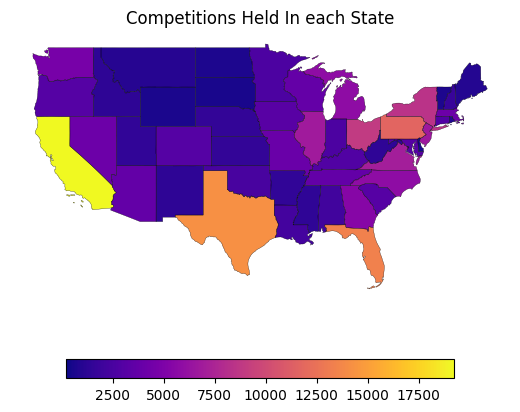

In [121]:
ax = shape.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10,5))
shape.plot(ax=ax, column='Count', legend=True, cmap='plasma', legend_kwds = {'shrink':0.5,'orientation':'horizontal'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'left', 'bottom', 'top']:
    ax.spines[edge].set_visible(False)

ax.set_title("Competitions Held In each State", size=12)

plt.show()